In [2]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')

# Gradient descent in 1D

In [3]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

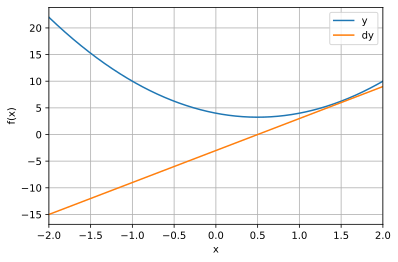

In [4]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [5]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[-1.49]


array([0.4959108])

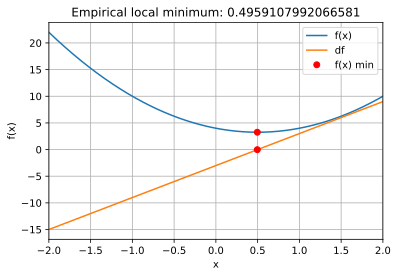

In [6]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Store the model parameters and outputs on each iteration

In [7]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin,grad


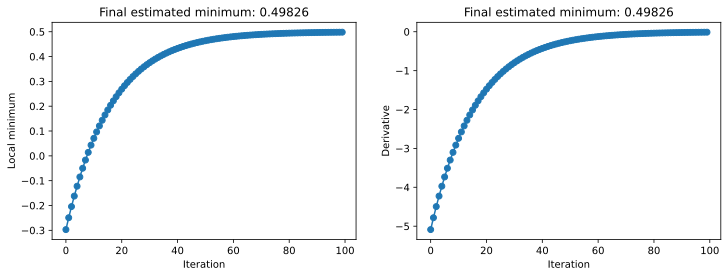

In [8]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Gradient descent in 2D

In [9]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

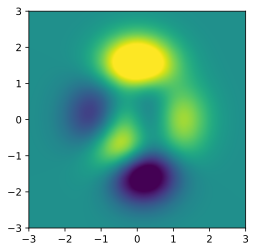

In [10]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [11]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [12]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[2.75628464572452 2.12451033432226]
[1.71532736 1.64006759]


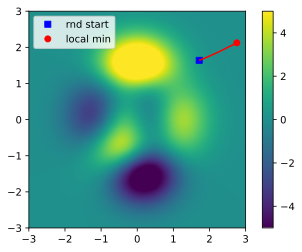

In [13]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

# Running experiments to understand gradient descent

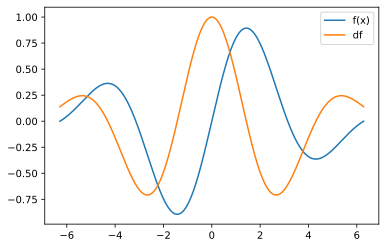

In [14]:
# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df']);

In [15]:
# function (note: over-writing variable names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

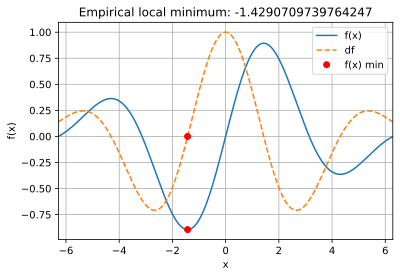

In [16]:
# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad



# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


# Run parametric experiments

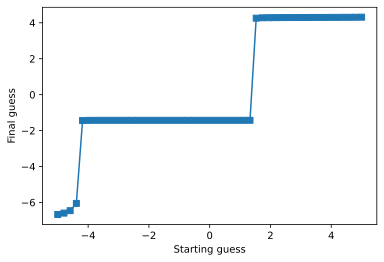

In [17]:
# Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):
  
  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
  
  # store the final guess
  finalres[idx] = localmin


# plot the results
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

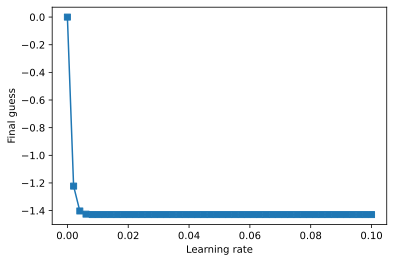

In [18]:
# Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):
  
  # force starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad
  
  # store the final guess
  finalres[idx] = localmin


plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [19]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):
  
    # run through training (again fixing starting location)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad
    
    # store the final guess
    finalres[Lidx,Eidx] = localmin


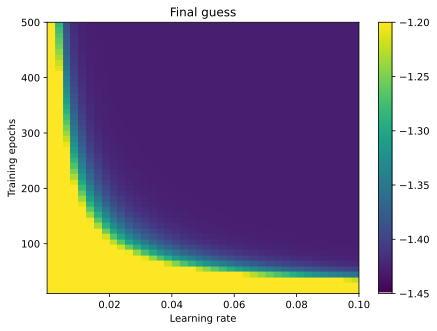

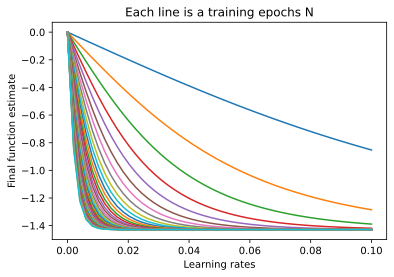

In [20]:
# plot the results

fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='bottom',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

# Code Together

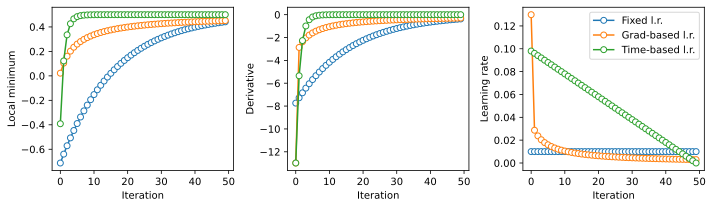

In [21]:
# Create the function and its derivative 
# define a range for x
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3


### G.D. using a fixed learning rate
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # non-adaptive learning rate
  lr = learning_rate

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsFixed[i,:] = localmin,grad,lr


### G.D. using a gradient-based learning rate
# random starting point
localmin = np.random.choice(x,1)
initval = localmin[:] # store the initial value

# learning parameters
learning_rate = .01
training_epochs = 50

# run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  
  # compute gradient
  grad = deriv(localmin)

  # adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)

  # update parameter according to g.d.
  localmin = localmin - lr*grad

  # store the parameters
  modelparamsGrad[i,:] = localmin,grad,lr



### G.D. using a time-based learning rate
# redefine parameters
learning_rate = .1
localmin = initval

# run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,:] = localmin,grad,lr


### Plot the results
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()



# Reference

These are codes learned from the Udemy 

COURSE: A deep understanding of deep learning

TEACHER: Mike X Cohen, sincxpress.com

COURSE URL: udemy.com/course/dudl/?couponCode=202109